# Quandl Financial Data

[Quandl](https://www.quandl.com/) is a website with lots of different financial and economic data available. Click [here](https://www.quandl.com/blog/getting-started-with-the-quandl-api) for instructions about how to use the API. You _may_ need to register for an API key, but I was able to get it to work without one. Notice also that you can get the data in either XML or JSON format. You may do the questions using whichever data format you feel more comfortable.

## Question 1 (10 points)

The `WIKI` database on Quandl contains information about the daily stock prices of 3000 stocks. Plot the daily stock price of Coca-Cola (Symbol: `KO`). No explanation needed, but make sure you label your plot appropriately.

In [3]:
# YOUR CODE HERE

#api-key: mAB4fzrtxEtdioDjTies
#https://www.quandl.com/docs/api

import requests

url = "https://www.quandl.com/api/v3/datasets/WIKI/KO.json"

params = {"api_key" : "mAB4fzrtxEtdioDjTies"}

out = requests.get(url, params=params)

data = out.json()

data

{'dataset': {'collapse': None,
  'column_index': None,
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Volume',
   'Ex-Dividend',
   'Split Ratio',
   'Adj. Open',
   'Adj. High',
   'Adj. Low',
   'Adj. Close',
   'Adj. Volume'],
  'data': [['2016-05-11',
    45.73,
    45.88,
    45.45,
    45.46,
    8664239.0,
    0.0,
    1.0,
    45.73,
    45.88,
    45.45,
    45.46,
    8664239.0],
   ['2016-05-10',
    45.44,
    45.84,
    45.42,
    45.75,
    8931387.0,
    0.0,
    1.0,
    45.44,
    45.84,
    45.42,
    45.75,
    8931387.0],
   ['2016-05-09',
    45.32,
    45.5,
    45.17,
    45.24,
    8002704.0,
    0.0,
    1.0,
    45.32,
    45.5,
    45.17,
    45.24,
    8002704.0],
   ['2016-05-06',
    45.06,
    45.41,
    44.915,
    45.32,
    8524298.0,
    0.0,
    1.0,
    45.06,
    45.41,
    44.915,
    45.32,
    8524298.0],
   ['2016-05-05',
    44.93,
    45.49,
    44.87,
    45.06,
    8724328.0,
    0.0,
    1.0,
    44.93,
    45.4

In [6]:
import pandas as pd
df = pd.DataFrame(columns=["date", "close"])
for dat in data["dataset"]["data"]:
    df.loc[len(df)] = {"date":dat[0], "close":dat[4]}
df

,date,close
0,2016-05-11,45.46
1,2016-05-10,45.75
2,2016-05-09,45.24
3,2016-05-06,45.32
4,2016-05-05,45.06
5,2016-05-04,44.98
6,2016-05-03,44.84
...,...,...
13677,1962-01-10,98.50
13678,1962-01-09,98.00


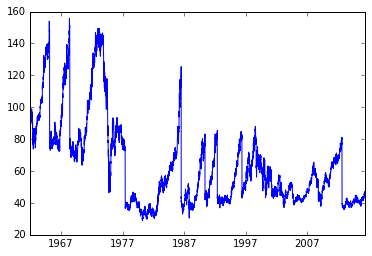

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

df['datetime'] = pd.to_datetime(df['date'])

fig, ax = plt.subplots()
ax.plot_date(df.datetime, df.close, '-')

## Question 2 (10 points)

A popular strategy known as **pairs trading** looks at the ratio between the prices of two stocks. If the ratio seems roughly constant over time, then pairs trading may work. In pairs trading, you look at deviations from the constant ratio. If the deviation is large, you sell the higher-priced stock and buy the lower-priced stock, since the expectation is that the ratio will come back to its long-term value.

Plot the ratio of the price of Coca-Cola to Pepsi (Symbol: `PEP`) over time. Does it seem like there is an opportunity for pairs trading to work? If so, when would have been a good time to sell Coke and buy Pepsi?

In [24]:
#df.set_index("datetime")

url = "https://www.quandl.com/api/v3/datasets/WIKI/PEP.json"
out2 = requests.get(url, params=params)
data2 = out2.json()

{'dataset': {'collapse': None,
  'column_index': None,
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Volume',
   'Ex-Dividend',
   'Split Ratio',
   'Adj. Open',
   'Adj. High',
   'Adj. Low',
   'Adj. Close',
   'Adj. Volume'],
  'data': [['2016-05-11',
    106.26,
    106.94,
    105.63,
    105.72,
    3366928.0,
    0.0,
    1.0,
    106.26,
    106.94,
    105.63,
    105.72,
    3366928.0],
   ['2016-05-10',
    105.43,
    106.63,
    105.33,
    106.57,
    3750347.0,
    0.0,
    1.0,
    105.43,
    106.63,
    105.33,
    106.57,
    3750347.0],
   ['2016-05-09',
    104.92,
    105.73,
    104.91,
    105.28,
    4389034.0,
    0.0,
    1.0,
    104.92,
    105.73,
    104.91,
    105.28,
    4389034.0],
   ['2016-05-06',
    103.68,
    104.97,
    103.68,
    104.96,
    3546367.0,
    0.0,
    1.0,
    103.68,
    104.97,
    103.68,
    104.96,
    3546367.0],
   ['2016-05-05',
    103.87,
    104.88,
    103.6,
    104.21,
    3396155.0,
  

In [51]:
di = {"date":[], "pep":[]}
for dat in data2["dataset"]["data"]:
    di["date"].append(pd.to_datetime(dat[0]))
    di["pep"].append(dat[4])
df2 = pd.DataFrame(di)

,date,pep
0,2016-05-11,105.72
1,2016-05-10,106.57
2,2016-05-09,105.28
3,2016-05-06,104.96
4,2016-05-05,104.21
5,2016-05-04,104.02
6,2016-05-03,103.56
...,...,...
11066,1972-06-09,83.87
11067,1972-06-08,83.75


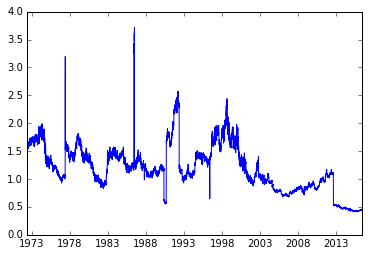

In [56]:
df["date"] = df["datetime"]
dfm = df.merge(df2, on="date")
dfm["ratio"] = dfm.close / dfm.pep_y
fig, ax = plt.subplots()
ax.plot_date(dfm.date, dfm.ratio, '-')

In [ ]:
date['ratio'] = date['close']/date['pep']

fig, ax = plt.subplots()
ax.plot_date(date.date, date.ratio, '-')
plt.xticks(rotation="vertical")

## Question 3 (10 points)

Find the date of the maximum decrease of Coca-Cola's stock price. (You can determine this by comparing its price on each day when markets opened and closed.

In [ ]:
di2 = {"date":[], "pep":[]}
for dat in data["dataset"]["data"]:
    di2["date"].append(pd.to_datetime(dat[0]))
    di2["open"].append(dat[1])
df3 = pd.DataFrame(di2)
dfm = df.merge(df3, on="date")

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [57]:
(dfm.close - dfm.open).max()

5.5